<a href="https://colab.research.google.com/github/Dzy00/CHL5230-Final-Project/blob/main/CHL5230_final_logReg_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model (Method 1) updated

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# read the cleaned dataset, so we don't have to rerun the above exploratory and cleaned code
CHANGE_selected = pd.read_csv('CHANGE_selected.csv')


# Define the column that will be used as the target for modeling or analysis
target_column = 'MacroVasc'

# List of columns that contain categorical data
categorical_columns = ['Sex','Any_AntiHTN','HeartFailure_Hx','AtrialFibrillation_Hx',
                       'Smoking_Status','Hypertension_Hx','diabetes']

# List of columns that contain numerical data (excluding categorical columns and the target column)
numerical_columns = [c for c in CHANGE_selected.columns if c not in categorical_columns and c != target_column]



In [2]:
##### prepare data
# Splitting the data into 70% training and 30% testing
train = CHANGE_selected.sample(frac=0.7, random_state=10)
test = CHANGE_selected.drop(train.index)

# separate X, y
X_train = train.drop('MacroVasc', axis = 1)
y_train = train['MacroVasc']

# imputate numerical columns with median
num_transformer = SimpleImputer(strategy = 'median')

# impute categorical columns with the most frequent value and encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    #('one_hot_encoder', OneHotEncoder())
    ])

# initialize a column transformer that handels imputation and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
        ],
    remainder='passthrough')


##### model fitting
# Initializing a logistic reg regression model
LR = LogisticRegression()

# Creating a pipeline that first preprocesses the data and then applies the decision tree
# this pipeline perform imputation, undersampling+upsampling, and model fitting
model = Pipeline([
    ('preprocessor', preprocessor),
    #('tomek', TomekLinks()),
    ('under_sample', RandomUnderSampler(sampling_strategy=0.5)),
    ('up_sample', SMOTE(sampling_strategy=1)),
    #('scaler', StandardScaler()),
    ('LR', LR)
])

# Display the pipeline architecture
model



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Age', 'BMI', 'sBP', 'dBP',
                                                   'HDL', 'TC', 'TG',
                                                   'Urin_Alb_Creat_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Sex', 'Any_AntiHTN',
                                                   'HeartFailure_Hx',
                                                   'AtrialFibrillation_Hx',
                                                   'Smoking_Status',
                                                   'Hypertension_Hx',
                                                   'diabetes'])])),
                ('under_sample', RandomUnderSampler(sampling_strategy=0.5)),
                ('up_sample', SMOTE(sampling_strategy=1)),
                ('LR', LogisticRegression())])

In [3]:
##### fit logistic regression model in CV
X = CHANGE_selected.drop('MacroVasc', axis = 1)
y = CHANGE_selected['MacroVasc']

# Number of folds for cross-validation and define kfold
n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation and obtain the accuracy scores for each fold
for train_index, test_index in kfold.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  #model = LogisticRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)

  print(f'Fold Accuracy: {accuracy}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8149275919518134


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8160194796872997


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8170079046925782


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.8135323005628633
Fold Accuracy: 0.8193198478526098


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[157914  34642]
 [   407   2111]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    192556
           1       0.06      0.84      0.11      2518

    accuracy                           0.82    195074
   macro avg       0.53      0.83      0.50    195074
weighted avg       0.99      0.82      0.89    195074



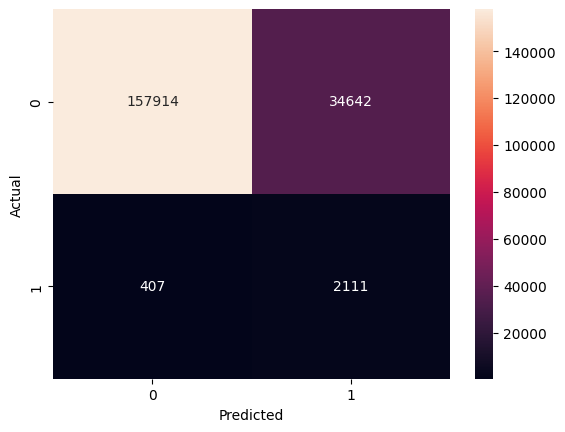

In [4]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# this pipeline perform imputation, undersampling+upsampling, and model fitting
model = Pipeline([
    ('preprocessor', preprocessor),
    #('tomek', TomekLinks()),
    ('under_sample', RandomUnderSampler(sampling_strategy=0.5)),
    ('up_sample', SMOTE(sampling_strategy=1)),
    #('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Logistic Regression Model (Method 2) updated

In [8]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

X = CHANGE_selected.drop('MacroVasc', axis = 1)
y = CHANGE_selected['MacroVasc']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### imputation
# imputate numerical columns with median
num_transformer = SimpleImputer(strategy = 'median')

# impute categorical columns with the most frequent value and encode
cat_transformer = SimpleImputer(strategy = 'most_frequent')

# initialize a column transformer that handels imputation
ct = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
        ],
    remainder='passthrough')

# Apply the ColumnTransformer to the data
ct.fit(X_train)
ct.fit(X_test)

# transform the data and convert to DataFrame with the new column names
X_train = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())
X_test = pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())

# undersample + upsample
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)
upsample = SMOTE(sampling_strategy=1)
X_resampled, y_resampled = upsample.fit_resample(X_resampled, y_resampled)


# Initializing a logistic reg regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC in this case)
    min_features_to_select=1,
)
rfecv.fit(X_resampled, y_resampled)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Optimal number of features: 13


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# which columns used and which wasn't
rfecv.support_

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True])

In [10]:
# features ranking low is better
rfecv.ranking_

array([1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1])

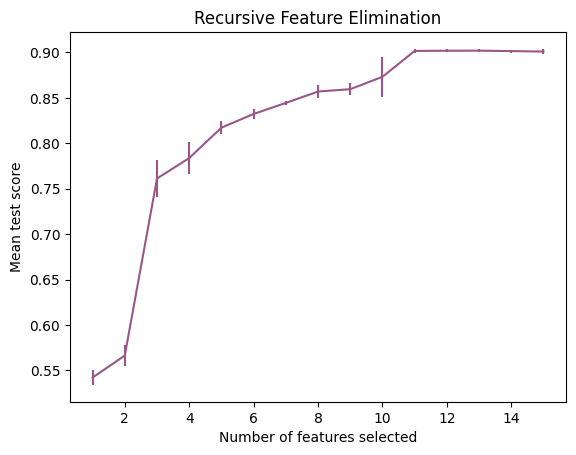

In [11]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687'  # Change the color to green
)

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

In [12]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


======== Training Set ==========
AUC :  0.8309024325319048
Accuracy :  0.8306598407281001
Confusion Matrix:
[[14365  2739]
 [ 3215 14841]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     17104
           1       0.84      0.82      0.83     18056

    accuracy                           0.83     35160
   macro avg       0.83      0.83      0.83     35160
weighted avg       0.83      0.83      0.83     35160

======== Test Set ==========
AUC :  0.52726588568362
Accuracy :  0.8172665509275081
Confusion Matrix:
[[235942    601]
 [ 52869   3200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90    236543
           1       0.84      0.06      0.11     56069

    accuracy                           0.82    292612
   macro avg       0.83      0.53      0.50    292612
weighted avg       0.82      0.82      0.75    292612



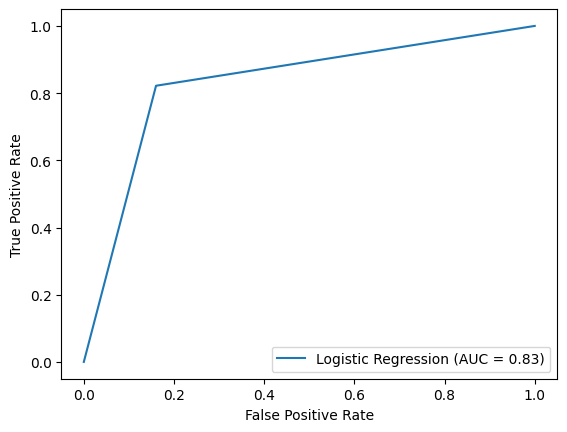

In [15]:
selected_columns = X_resampled.columns[rfecv.support_]

# Select only the features that were chosen by RFECV
X_resampled_train = X_resampled[selected_columns]
X_test = X_test[selected_columns]

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_resampled_train, y_resampled)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_resampled_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_pred_train, y_resampled)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()